In [1]:
# Import needed Libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
path = 'loan.csv' # Change the path here if different
df = pd.read_csv(path)


# Understanding the data: number of entries, columns, datatypes
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.columns.size

# Data Cleaning

## Filtering Data

In [3]:
# Keeping only data relevant for the problem statement: loan status != Current
df = df[df.loan_status != 'Current']
df.reset_index(drop=True,inplace=True)

## Removing unnecessary columns

In [4]:
# Listing columns with No values or all values are missing
df.dropna(axis=1,how='all',inplace=True)

#Dropping insignificant Columns
df.drop(columns=['desc','url','title'],inplace=True)

#Dropping columns with >50% NA values
df.drop(columns=['mths_since_last_delinq','mths_since_last_record'],inplace=True)

# Dropping Columns with only one unique value
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df.drop(cols_to_drop, axis=1,inplace=True)
df.columns.size

40

## Fixing data types

In [5]:
# Removing % 
df.int_rate = df.int_rate.apply(lambda x : float(x.replace('%','')))
df.revol_util = df.revol_util.apply(lambda x : float(str(x).replace('%','')))

In [6]:
def correct_years_beyong_1969(dt):
    current_year = pd.to_datetime('now').year
    if dt.year > current_year:
        dt = dt.replace(year=dt.year-100)
    return dt

In [7]:
# Converting dates in string format to datetime format of pandas
current_year = pd.to_datetime('now').year
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y').apply(lambda x : correct_years_beyong_1969(x))
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line,format='%b-%y').apply(lambda x : correct_years_beyong_1969(x))
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d,format='%b-%y').apply(lambda x : correct_years_beyong_1969(x))
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d,format='%b-%y').apply(lambda x : correct_years_beyong_1969(x))

## Fix Missing Values

In [ ]:
missing_values = df.isna().any()
missing_values[missing_values == True]

### Imputing Missing Values


In [181]:
# Imputing Missing values for revol_util with mean
revol_util_mean = df.revol_util.mean()
df.revol_util.fillna(value=revol_util_mean,inplace=True)

# Imputing Missing values for pub_rec_bankruptcies with median as it is a representative figure and should be a whole number
prb_median = df.pub_rec_bankruptcies.median()
df.pub_rec_bankruptcies.fillna(value=prb_median,inplace=True)


# Intermediate data separation

In [8]:
df.to_csv('filtered_data.csv')

In [8]:
print(list(df.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies']


In [182]:
df_co =  df[df.loan_status == 'Charged Off']
df_fp = df[df.loan_status == 'Fully Paid']

# Univariate Analysis

In [ ]:
# id, member_id are unique. It doesn't make sense to do univariate analysis on those columns
# Univariate analysis on loan_amnt
plt.boxplot(df.loan_amnt)
plt.ylabel('Loan Amount')
plt.xticks([1],['Loan Applicants'])
plt.title('Loan Amount Distribution')
plt.show()

In [ ]:
# Univariate analysis on funded_amnt
plt.boxplot(df.funded_amnt)
plt.ylabel('Funded Amount')
plt.xticks([1],['Loan Applicants'])
plt.title('Funded Amount Distribution')
plt.show()

In [ ]:
# Univariate analysis on funded_amnt_inv
plt.boxplot(df.funded_amnt_inv)
plt.ylabel('Funded Amount Investors')
plt.xticks([1],['Loan Applicants'])
plt.title('Funded Amount by Investors Distribution')
plt.show()

In [ ]:
# Univariate analysis on term
df.term.value_counts().sort_index().plot.bar()
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Frequency Distribution of Loan Term')
plt.show()

In [ ]:
# Univariate analysis on int_rate
plt.boxplot(df.int_rate)
plt.ylabel('Interest Rate in %')
plt.xticks([1],['Loan Applicants'])
plt.title('Interest Rate Distribution')
plt.show()

In [ ]:
# Univariate analysis on installment
plt.boxplot(df.installment)
plt.ylabel('Installment amount')
plt.xticks([1],['Loan Applicants'])
plt.title('Installment Amount Distribution')
plt.show()

In [ ]:
# Univariate analysis on Loan Grade
df.grade.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Loan Grade')
plt.xticks(rotation=0)
plt.title('Frequency Distribution of Loan Grade')
plt.show()

In [ ]:
# Univariate analysis on Loan Sub Grade
df.sub_grade.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Loan Sub Grade')
plt.title('Frequency Distribution of Loan Sub Grade')
plt.show()

## TODO Adjust the Fig Size Later

In [41]:
# df.emp_title.value_counts().plot.bar()
# plt.ylabel('Frequency')
# plt.xticks(rotation=0)
# plt.title('Frequency Distribution of Borrower\'s emp title')
# plt.show()
# TODO


US Army                      131
Bank of America              107
IBM                           65
AT&T                          57
Kaiser Permanente             56
                            ... 
surveying and mapping          1
Town of Boonton                1
Toyota Motor Manufaturing      1
Agile1 Inc.                    1
arc usa valley central co      1
Name: emp_title, Length: 28027, dtype: int64

In [ ]:
# Univariate analysis on Employment Length
df.emp_length.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Employment Length in years')
plt.title('Frequency Distribution of Borrower\'s Employment Length')
plt.show()

# TODO Missing value imputation for emp_length

In [ ]:
# Univariate analysis on Home Ownership
df.home_ownership.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Home Ownership Status')
plt.xticks(rotation=0)
plt.title('Frequency Distribution of Home Ownership Status')
plt.show()

In [ ]:
# Univariate analysis on annual_inc
plt.boxplot(df.annual_inc)
plt.ylabel('Annual Income')
plt.xticks([1],['Loan Applicants'])
plt.title('Annual Income Distribution')
plt.show()

In [ ]:
# Univariate analysis on Verification Status
df.verification_status.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Verification Status')
plt.xticks(rotation=0)
plt.title('Frequency Distribution of Verification Status')
plt.show()


In [ ]:
# Univariate analysis on Issue date
df.issue_d.dt.year.value_counts().sort_index().plot.bar()
plt.ylabel('Loans Issued')
plt.xlabel('Issuing Year')
plt.xticks(rotation=0)
plt.title('Distribution of Loans Issued across years')
plt.show()

In [ ]:
# Univariate analysis on Purpose
df.purpose.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Purpose')
plt.show()

In [ ]:
# Univariate analysis on State
df.addr_state.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.title('Frequency Distribution of State')
plt.show()

#TODO figure size issue fix

In [ ]:
# Univariate analysis on dti
plt.boxplot(df.dti)
plt.ylabel('Debt to Income Ratio')
plt.xticks([1],['Loan Applicants'])
plt.title('Debt to Income Ratio Distribution')
plt.show()

In [ ]:
# Univariate analysis on delinq_2yrs
df.delinq_2yrs.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Deliquent Incidences in 2 years')
plt.xticks(rotation=90)
plt.title('Frequency Distribution across Deliquent Incidences in 2 years ')
plt.show()

In [ ]:
# Univariate analysis on Earliest Credit Line
df.earliest_cr_line.dt.year.plot.hist(edgecolor='white',color='brown',bins=10)
plt.ylabel('Frequency')
plt.xlabel('Year of Earliest LOC')
plt.xticks(rotation=0)
plt.title('Frequency Distribution w.r.t Earliest LOC')
plt.show()


In [ ]:
# Univariate analysis on Number of Inquiries in the last 6 months
df.inq_last_6mths.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Number of Inquiries in the last 6 months')
plt.xticks(rotation=0)
plt.title('Frequency Distribution across Number of Inquiries in the last 6 months')
plt.show()

In [ ]:
# Univariate analysis on Open Credit Lines
plt.boxplot(df.open_acc)
plt.ylabel('Open Credit Lines')
plt.xticks([1],['Loan Applicants'])
plt.title('Open Credit Lines Distribution')
plt.show()

In [ ]:
# Univariate analysis on Public Records
df.pub_rec.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Public Records')
plt.xticks(rotation=0)
plt.title('Frequency Distribution across Public Records')
plt.show()

In [ ]:
# Univariate analysis on Revolving Balance
plt.boxplot(df.revol_bal)
plt.ylabel('Revolving Balance')
plt.xticks([1],['Loan Applicants'])
plt.title('Revolving Balance Distribution')
plt.show()

In [ ]:
# Univariate analysis on Revolving Line Util. Rate
df.revol_util.plot.hist(edgecolor='white',color='brown',bins=50)
plt.ylabel('Frequency')
plt.xlabel('Revolving Line Util Rate')
plt.xticks(rotation=0)
plt.title('Frequency Distribution w.r.t Revolving Line Util Rate')
plt.show()


In [ ]:
# Univariate analysis on Total Credit Lines
plt.boxplot(df.total_acc)
plt.ylabel('Total Credit Lines')
plt.xticks([1],['Loan Applicants'])
plt.title('Total Credit Lines Distribution')
plt.show()

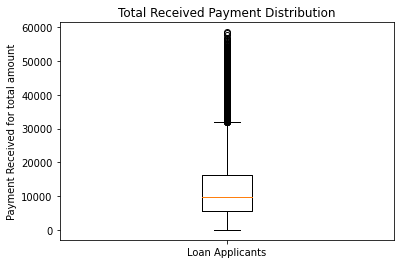

In [12]:
# Univariate analysis on Payment Received for total amnt
plt.boxplot(df.total_pymnt)
plt.ylabel('Payment Received for total amount')
plt.xticks([1],['Loan Applicants'])
plt.title('Total Received Payment Distribution')
plt.show()

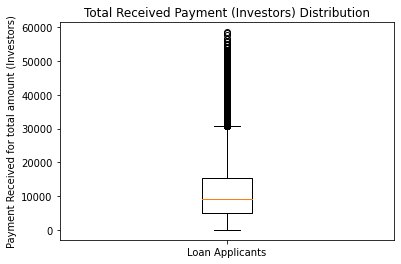

In [14]:
# Univariate analysis on Payment Received for total amnt by investors
plt.boxplot(df.total_pymnt_inv)
plt.ylabel('Payment Received for total amount (Investors)')
plt.xticks([1],['Loan Applicants'])
plt.title('Total Received Payment (Investors) Distribution')
plt.show()

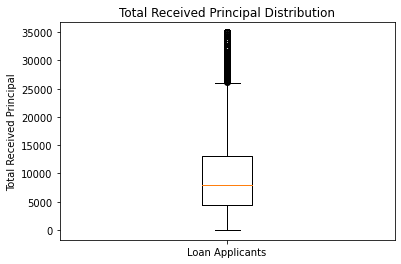

In [17]:
# Univariate analysis on Total Received Principal
plt.boxplot(df.total_rec_prncp)
plt.ylabel('Total Received Principal')
plt.xticks([1],['Loan Applicants'])
plt.title('Total Received Principal Distribution')
plt.show()

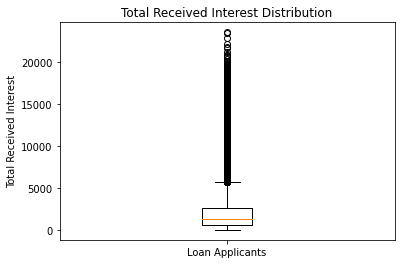

In [18]:
# Univariate analysis on Total Received Interest
plt.boxplot(df.total_rec_int)
plt.ylabel('Total Received Interest')
plt.xticks([1],['Loan Applicants'])
plt.title('Total Received Interest Distribution')
plt.show()

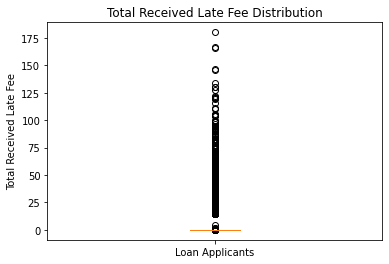

In [20]:
# Univariate analysis on Total Received Late Fee
plt.boxplot(df.total_rec_late_fee)
plt.ylabel('Total Received Late Fee')
plt.xticks([1],['Loan Applicants'])
plt.title('Total Received Late Fee Distribution')
plt.show()

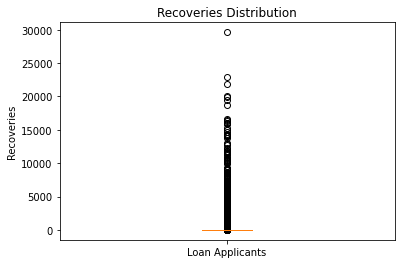

In [21]:
# Univariate analysis on recoveries
plt.boxplot(df.recoveries)
plt.ylabel('Recoveries')
plt.xticks([1],['Loan Applicants'])
plt.title('Recoveries Distribution')
plt.show()

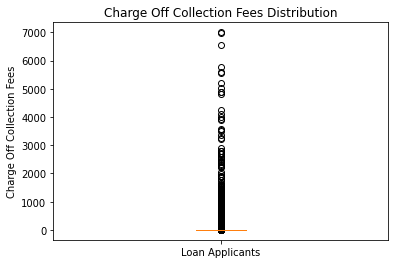

In [22]:
# Univariate analysis on Charge Off Collection Fees
plt.boxplot(df.collection_recovery_fee)
plt.ylabel('Charge Off Collection Fees')
plt.xticks([1],['Loan Applicants'])
plt.title('Charge Off Collection Fees Distribution')
plt.show()

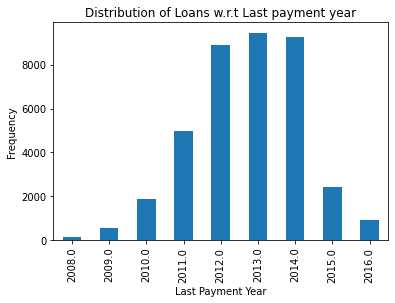

In [31]:
# Univariate analysis on Last Payment date
df.last_pymnt_d.dt.year.value_counts().sort_index().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Last Payment Year')
plt.xticks(rotation=90)
plt.title('Distribution of Loans w.r.t Last payment year')
plt.show()

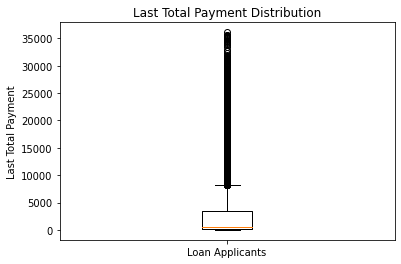

In [32]:
# Univariate analysis on Last Total Payment
plt.boxplot(df.last_pymnt_amnt)
plt.ylabel('Last Total Payment')
plt.xticks([1],['Loan Applicants'])
plt.title('Last Total Payment Distribution')
plt.show()

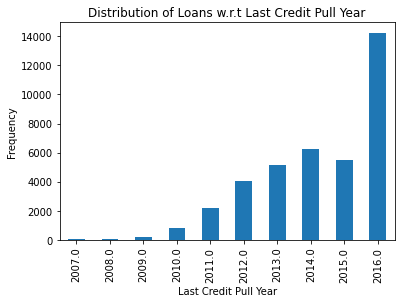

In [33]:
# Univariate analysis on Last Credit Pull Year
df.last_credit_pull_d.dt.year.value_counts().sort_index().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Last Credit Pull Year')
plt.xticks(rotation=90)
plt.title('Distribution of Loans w.r.t Last Credit Pull Year')
plt.show()

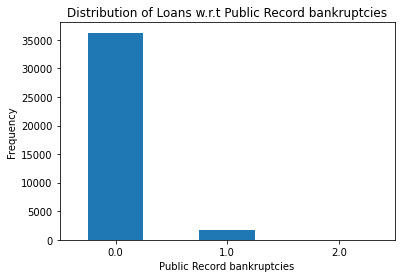

In [40]:
# Univariate analysis on Public Record bankruptcies
df.pub_rec_bankruptcies.value_counts().sort_index().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Public Record bankruptcies')
plt.xticks(rotation=0)
plt.title('Distribution of Loans w.r.t Public Record bankruptcies')
plt.show()

# Segmented Univariate Analysis

In [46]:
def display_bar_height_in_percent(ax):
    for c in ax.containers:
        #Customize the labels
        labels = [str(v.get_height()) + '%'  if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')

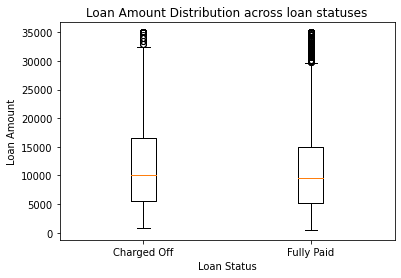

"Loan Amount doesn't seem to influence the loan status as both charged off and fully paid has approximately same IQR"

In [55]:
# id, member_id are unique. It doesn't make sense to do Segmented univariate analysis using those columns
# Segmented Univariate analysis using loan_amnt
fig, ax = plt.subplots()
ax.boxplot([df_co.loan_amnt,df_fp.loan_amnt])
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.title('Loan Amount Distribution across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Loan Amount doesn't seem to influence the loan status much as both charged off and fully paid has approximately same IQR"""

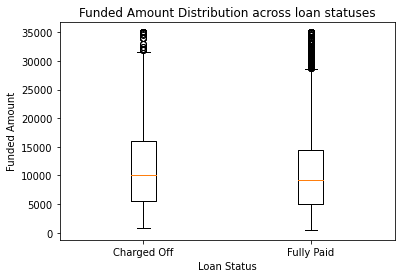

"Funded Amount doesn't seem to influence the loan status as both charged off and fully paid has approximately same IQR"

In [56]:
# Segmented Univariate analysis using funded_amnt
fig, ax = plt.subplots()
ax.boxplot([df_co.funded_amnt,df_fp.funded_amnt])
plt.ylabel('Funded Amount')
plt.xlabel('Loan Status')
plt.title('Funded Amount Distribution across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Funded Amount doesn't seem to influence the loan status much as both charged off and fully paid has approximately same IQR"""

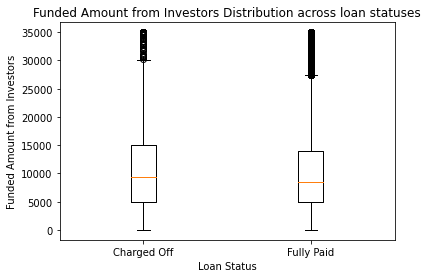

"Funded Amount from Investors doesn't seem to influence the loan status much as both charged off and fully paid has approximately same IQR"

In [58]:
# Segmented Univariate analysis using funded_amnt_inv
fig, ax = plt.subplots()
ax.boxplot([df_co.funded_amnt_inv,df_fp.funded_amnt_inv])
plt.ylabel('Funded Amount from Investors')
plt.xlabel('Loan Status')
plt.title('Funded Amount from Investors Distribution across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Funded Amount from Investors doesn't seem to influence the loan status much as both charged off and fully paid has approximately same IQR"""

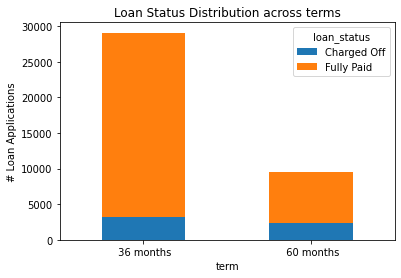

'Loan Applicants with the term 60 months are more likely to default than that of 36 months'

In [92]:
# Segmented Univariate analysis using term
df.groupby(['term','loan_status'])['loan_status'].count().unstack().plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('# Loan Applications')
plt.title('Loan Status Distribution across terms')
plt.show()
"""Loan Applicants with the term 60 months are more likely to default than that of 36 months"""

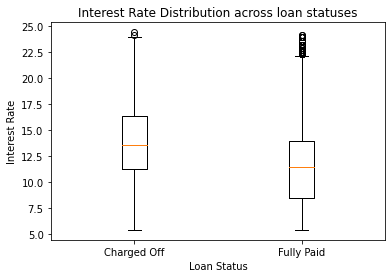

'Loan Applicants who got loan for higher interest rates are more likely to default than that of lower interest rates'

In [101]:
# Segmented Univariate analysis using int_rate
fig, ax = plt.subplots()
ax.boxplot([df_co.int_rate,df_fp.int_rate])
plt.ylabel('Interest Rate')
plt.xlabel('Loan Status')
plt.title('Interest Rate Distribution across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Loan Applicants who got loan for higher interest rates are more likely to default than that of lower interest rates"""

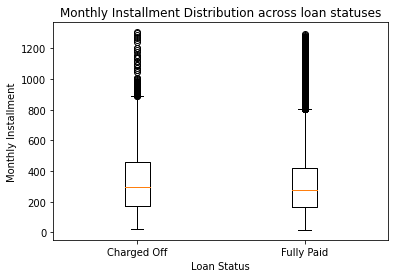

"Monthly Installment Amount doesn't seem to influence the loan status much as both charged off and fully paid has approximately same IQR"

In [104]:
# Segmented Univariate analysis using installment
fig, ax = plt.subplots()
ax.boxplot([df_co.installment,df_fp.installment])
plt.ylabel('Monthly Installment')
plt.xlabel('Loan Status')
plt.title('Monthly Installment Distribution across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()
"""Monthly Installment Amount doesn't seem to influence the loan status much as both charged off and fully paid has approximately same IQR"""

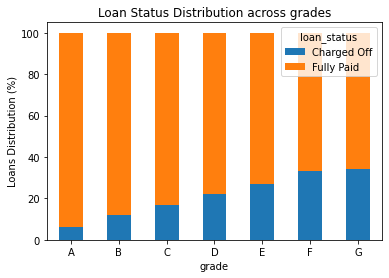

'Loan Applicants with grades E,F,G are more likely to default than that of others. This correlates with interest rates analysis since E,F,G grades has higher interest rates'

In [149]:
# Segmented Univariate analysis using grade
df_grouped = df.groupby(['grade','loan_status'])['loan_status'].count().unstack()
df_grouped.apply(lambda x : round(x*100/x.sum()),axis=1).plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Loans Distribution (%)')
plt.title('Loan Status Distribution across grades')
plt.show()

"""Loan Applicants with grades E,F,G are more likely to default than that of others. This correlates with interest rates analysis since E,F,G grades has higher interest rates"""

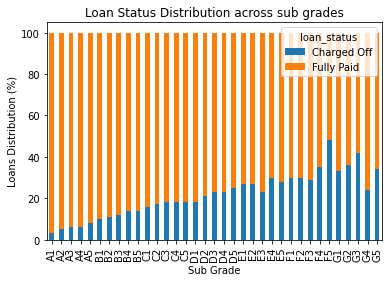

'Loan Applicants with subgrades E1,E2 ... G5 are more likely to default than that of others. This correlates with interest rates analysis since E1 to G5 sub grades has higher interest rates'

In [150]:
# Segmented Univariate analysis using sub_grade
df_grouped = df.groupby(['sub_grade','loan_status'])['loan_status'].count().unstack()
df_grouped.apply(lambda x : round(x*100/x.sum()),axis=1).plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.ylabel('Loans Distribution (%)')
plt.xlabel('Sub Grade')
plt.title('Loan Status Distribution across sub grades')
plt.show()

"""Loan Applicants with subgrades E1,E2 ... G5 are more likely to default than that of others. This correlates with interest rates analysis since E1 to G5 sub grades has higher interest rates"""

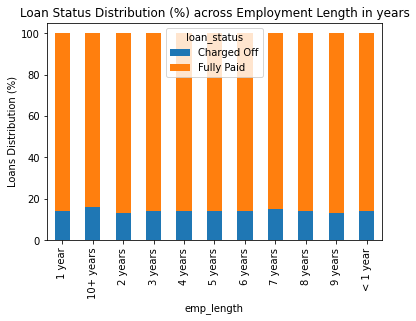

"Employment length doesn't seem to influence the loan status much as the % of defaulters remained constant across different employment length"

In [151]:
# Segmented Univariate analysis using emp_length
df_grouped = df.groupby(['emp_length','loan_status'])['loan_status'].count().unstack()
df_grouped.apply(lambda x : round(x*100/x.sum()),axis=1).plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.ylabel('Loans Distribution (%)')
plt.title('Loan Status Distribution (%) across Employment Length in years')
plt.show()

"""Employment length doesn't seem to influence the loan status much as the % of defaulters remained constant across different employment length"""

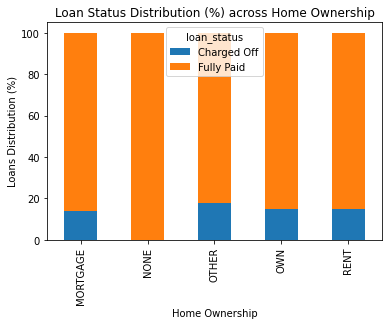

"Home Ownership doesn't seem to influence the loan status much as the % of defaulters remained constant across different Home Ownership. However, Home Ownership= None has no defaulters. "

In [158]:
# Segmented Univariate analysis using home_ownership
df_grouped = df.groupby(['home_ownership','loan_status'])['loan_status'].count().unstack()
df_grouped.apply(lambda x : round(x*100/x.sum()),axis=1).plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.ylabel('Loans Distribution (%)')
plt.xlabel('Home Ownership')
plt.title('Loan Status Distribution (%) across Home Ownership')
plt.show()

#TODO: Explain more on NONE Home ownership

"""Home Ownership doesn't seem to influence the loan status much as the % of defaulters remained constant across different Home Ownership. However, Home Ownership= None has no defaulters. """

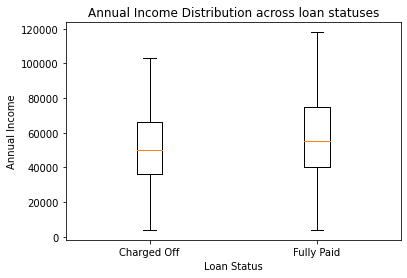

'Loan Applicants who has lesser Annual Income are likely to default than that of higher annual income'

In [25]:
# Segmented Univariate analysis using annual_inc

# Remove the outliers to make IQR visible and comparable
df_co_90 = df_co[df_co.annual_inc <= df_co.annual_inc.quantile(0.90)]
df_fp_90 = df_fp[df_fp.annual_inc <= df_fp.annual_inc.quantile(0.90)]
fig, ax = plt.subplots()
ax.boxplot([df_co_90.annual_inc,df_fp_90.annual_inc])
plt.ylabel('Annual Income')
plt.xlabel('Loan Status')
plt.title('Annual Income Distribution across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Loan Applicants who has lesser Annual Income are likely to default than that of higher annual income"""

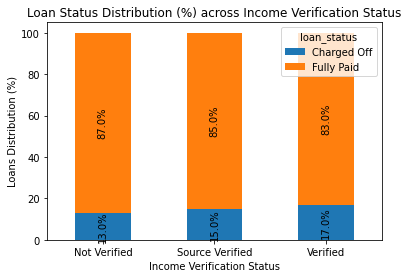

'Surpisingly Loan Applications whose Income is verified defaults more than others by atleast 2%. May be verification process needs to be revisited '

In [45]:
# Segmented Univariate analysis using Income Verification Status
df_grouped = df.groupby(['verification_status','loan_status'])['loan_status'].count().unstack()
ax = df_grouped.apply(lambda x : round(x*100/x.sum()),axis=1).plot(kind='bar', stacked=True)
display_bar_height_in_percent(ax)
plt.xticks(rotation=0)
plt.ylabel('Loans Distribution (%)')
plt.xlabel('Income Verification Status')
plt.title('Loan Status Distribution (%) across Income Verification Status')
plt.show()

"""Surpisingly Loan Applications whose Income is verified defaults more than others by atleast 2%. May be verification process needs to be revisited """

In [ ]:
# TODO: Leaving out issue_d, zip_code, addr_state, earliest_cr_line,last_pymnt_d,last_credit_pull_d

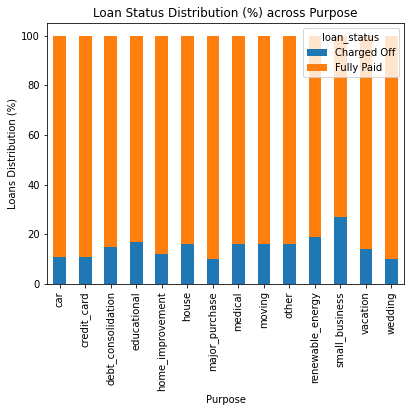

'Loan Applicants for the purpose of Small Business tend to default more than other purposes by a huge difference between 8 % - 17 %'

In [75]:
# Segmented Univariate analysis using purpose
df_grouped = df.groupby(['purpose','loan_status'])['loan_status'].count().unstack()
ax = df_grouped.apply(lambda x : round(x*100/x.sum()),axis=1).plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.ylabel('Loans Distribution (%)')
plt.xlabel('Purpose')
plt.title('Loan Status Distribution (%) across Purpose')
plt.show()

"""Loan Applicants for the purpose of Small Business tend to default more than other purposes by a huge difference between 8 % - 17 %"""

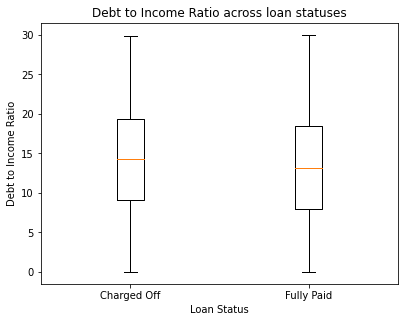

'It appears that loan applications with higher debt to income ratio likely to default. But this is not a strong indicator as the difference of dti between them in mean and 75th percentile is merely ~1 '

In [83]:
# Segmented Univariate analysis using dti
fig, ax = plt.subplots()
ax.boxplot([df_co.dti,df_fp.dti])
plt.ylabel('Debt to Income Ratio')
plt.xlabel('Loan Status')
plt.title('Debt to Income Ratio across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""It appears that loan applications with higher debt to income ratio likely to default. But this is not a strong indicator as the difference of dti between them in mean and 75th percentile is merely ~1 """

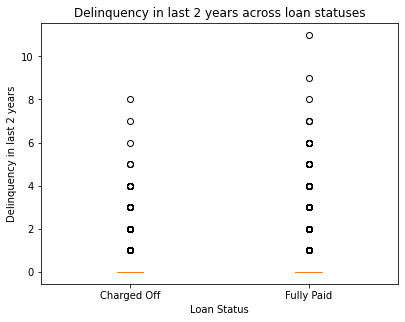

"Delinquency in last 2 years doesn't influence the likelihood of loan defaults as 85% of values are 0 for both loan statuses"

In [101]:
# Segmented Univariate analysis using delinq_2yrs
fig, ax = plt.subplots()
ax.boxplot([df_co.delinq_2yrs,df_fp.delinq_2yrs])
plt.ylabel('Delinquency in last 2 years')
plt.xlabel('Loan Status')
plt.title('Delinquency in last 2 years across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Delinquency in last 2 years doesn't influence the likelihood of loan defaults as 85% of values are 0 for both loan statuses"""

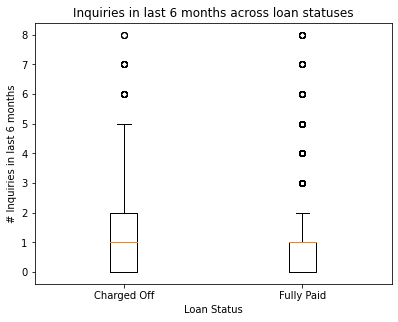

'Loan Applicatns with atleast 1 inquiry in last 6 months is likely to default compared to the ones with 0 inquiries'

In [111]:
# Segmented Univariate analysis using number of inquiries in last 6 months
fig, ax = plt.subplots()
ax.boxplot([df_co.inq_last_6mths,df_fp.inq_last_6mths])
plt.ylabel('# Inquiries in last 6 months')
plt.xlabel('Loan Status')
plt.title('Inquiries in last 6 months across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Loan Applicatns with atleast 1 inquiry in last 6 months is likely to default compared to the ones with 0 inquiries"""

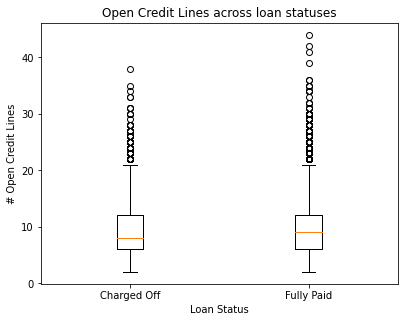

"Open Credit Lines doesn't influence the likelihood of defaulting the loan as IQR for both the loan statuses are similar"

In [115]:
# Segmented Univariate analysis using open credit lines
fig, ax = plt.subplots()
ax.boxplot([df_co.open_acc,df_fp.open_acc])
plt.ylabel('# Open Credit Lines')
plt.xlabel('Loan Status')
plt.title('Open Credit Lines across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()


"""Open Credit Lines doesn't influence the likelihood of defaulting the loan as IQR for both the loan statuses are similar"""


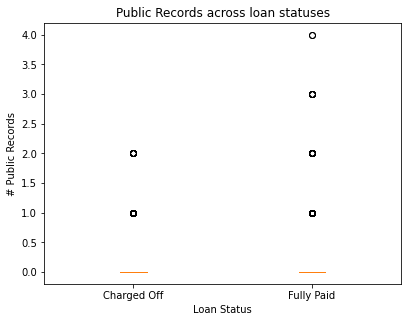

"Public Records doesn't influence the likelihood of loan defaults as 85% of values are 0 for both loan statuses"

In [119]:
# Segmented Univariate analysis using Public Records
fig, ax = plt.subplots()
ax.boxplot([df_co.pub_rec,df_fp.pub_rec])
plt.ylabel('# Public Records')
plt.xlabel('Loan Status')
plt.title('Public Records across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Public Records doesn't influence the likelihood of loan defaults as 85% of values are 0 for both loan statuses"""

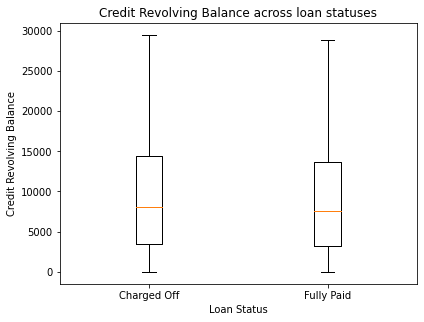

'Loan Applications with higher credit revolving balance are more likely to default than the others. The difference is not striking though'

In [127]:
# Segmented Univariate analysis using Credit Revolving Balance
# Remove the outliers to make IQR visible and comparable
df_co_90 = df_co[df_co.revol_bal <= df_co.revol_bal.quantile(0.90)]
df_fp_90 = df_fp[df_fp.revol_bal <= df_fp.revol_bal.quantile(0.90)]
fig, ax = plt.subplots()
ax.boxplot([df_co_90.revol_bal,df_fp_90.revol_bal])
plt.ylabel('Credit Revolving Balance')
plt.xlabel('Loan Status')
plt.title('Credit Revolving Balance across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Loan Applications with higher credit revolving balance are more likely to default than the others. The difference is not striking though"""

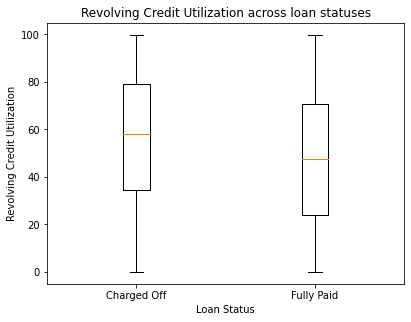

'Loan Applications with higher revolving credit utilization tend to default the loan than others'

In [144]:
# Segmented Univariate analysis using Revolving Credit Utilization
fig, ax = plt.subplots()
ax.boxplot([df_co.revol_util,df_fp.revol_util])
plt.ylabel('Revolving Credit Utilization')
plt.xlabel('Loan Status')
plt.title('Revolving Credit Utilization across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Loan Applications with higher revolving credit utilization tend to default the loan than others"""

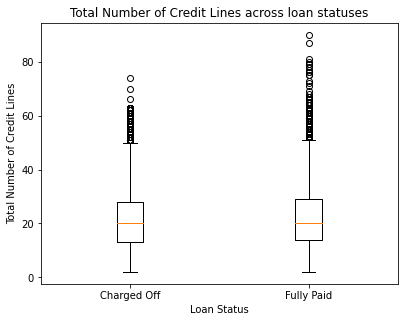

"Total Number of Credit Lines doesn't seem to influence the likelihood to defaulting the loan"

In [148]:
# Segmented Univariate analysis using Total Number of Credit Lines
fig, ax = plt.subplots()
ax.boxplot([df_co.total_acc,df_fp.total_acc])
plt.ylabel('Total Number of Credit Lines')
plt.xlabel('Loan Status')
plt.title('Total Number of Credit Lines across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Total Number of Credit Lines doesn't seem to influence the likelihood to defaulting the loan"""

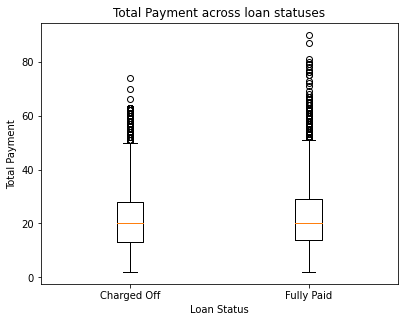

'Total Payment, Total Payment from investors, total principal received, total interest received, total late fee received, number of recoveries, collection recovery fee are all biased for charged off statues. So deriving insights from them will not make sense'

In [163]:
# Segmented Univariate analysis using Total Payment
fig, ax = plt.subplots()
ax.boxplot([df_co.total_acc,df_fp.total_acc])
plt.ylabel('Total Payment')
plt.xlabel('Loan Status')
plt.title('Total Payment across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Total Payment, Total Payment from investors, total principal received, total interest received, total late fee received, number of recoveries, collection recovery fee are all biased for charged off statues. So deriving insights from them will not make sense"""


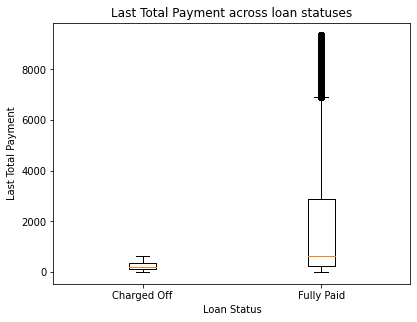

In [175]:
# Segmented Univariate analysis using Last Total Payment
# Remove the outliers to make IQR visible and comparable
df_co_90 = df_co[df_co.last_pymnt_amnt <= df_co.last_pymnt_amnt.quantile(0.90)]
df_fp_90 = df_fp[df_fp.last_pymnt_amnt <= df_fp.last_pymnt_amnt.quantile(0.90)]
fig, ax = plt.subplots()
ax.boxplot([df_co_90.last_pymnt_amnt,df_fp_90.last_pymnt_amnt])
plt.ylabel('Last Total Payment')
plt.xlabel('Loan Status')
plt.title('Last Total Payment across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Loan Applications who paid lesser last total payment is more likely to default the loan"""
# TODO: Not sure if this is again biased for default loan status. cross check again

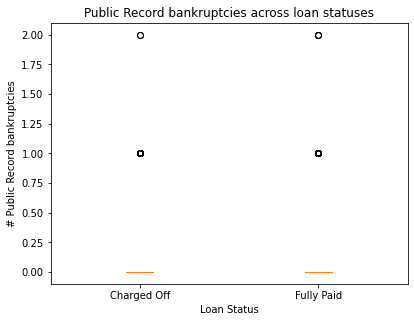

"Number of Public Record banruptcies doesn't seem to influence the likelihood of defaulting the loan since 85% of the values are 0 for both"

In [184]:
# Segmented Univariate analysis using Number of Public Record bankruptcies
fig, ax = plt.subplots()
ax.boxplot([df_co.pub_rec_bankruptcies,df_fp.pub_rec_bankruptcies])
plt.ylabel('# Public Record bankruptcies')
plt.xlabel('Loan Status')
plt.title('Public Record bankruptcies across loan statuses')
plt.xticks([1,2],['Charged Off','Fully Paid'])
plt.show()

"""Number of Public Record banruptcies doesn't seem to influence the likelihood of defaulting the loan since 85% of the values are 0 for both"""

# Bivariate Analysis